In [ ]:
##imports

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import BatchNormalization

import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import zipfile
import cv2
import pickle

In [0]:
data_root=pathlib.Path('/content/drive/My Drive/101_ObjectCategories_resized')

In [0]:
labels = []
# i=1
for item in data_root.glob('*'):
  if item.name!='.DS_Store':
    # print(item.name)
    labels.append(item.name)

In [0]:
labels_lst = []
training_data = []
i=0
for category in labels:
  
  path = os.path.join(data_root,category)  
 
  labels_lst.append([item.name,i])
  
  for img in os.listdir(path):  
      img_array = cv2.imread(os.path.join(path,img)) 
      training_data.append([img_array,i])
       
  i=i+1

In [0]:
pickle_out = open("/content/drive/My Drive/training_data.pickle","wb")
pickle.dump(training_data, pickle_out)

In [3]:
##prepare data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

pickle_in = open("/content/drive/My Drive/training_data.pickle","rb")
training_data = pickle.load(pickle_in)


In [0]:
import random
random.shuffle(training_data)

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
#normalize image array
X = (np.asarray(X, dtype=np.float32))/255.0

In [0]:
##one-hot encode labels

from sklearn import preprocessing
from keras import utils
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

# encode class values as integers
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [23]:
X.shape

(8677, 64, 64, 3)

In [75]:
##LeNet5-baseline

model_base = models.Sequential()
model_base.add(layers.Conv2D(32, (5, 5), activation='relu',input_shape =(64, 64, 3), padding='same'))
model_base.add(layers.MaxPooling2D((4, 4),padding='valid',strides=4))

model_base.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model_base.add(layers.MaxPooling2D((4, 4), padding='same',strides=4))

model_base.add(layers.Flatten())
model_base.add(Dense(1024, activation='relu'))
model_base.add(Dense(84, activation='relu'))
model_base.add(Dense(101, activation='softmax'))
model_base.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_70 (Dense)             (None, 84)              

In [76]:
from keras import optimizers
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_base.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=opt,
              metrics = ['accuracy'])

history = model_base.fit(X, dummy_y, epochs=100, validation_split=0.1,batch_size=200)

Train on 7809 samples, validate on 868 samples
Epoch 1/100
7809/7809 [==============================] - 2s 298us/sample - loss: 4.4038 - acc: 0.0893 - val_loss: 4.2774 - val_acc: 0.1025
Epoch 2/100
7809/7809 [==============================] - 1s 120us/sample - loss: 4.1841 - acc: 0.1593 - val_loss: 4.1014 - val_acc: 0.2189
Epoch 3/100
7809/7809 [==============================] - 1s 120us/sample - loss: 3.9694 - acc: 0.2276 - val_loss: 3.8588 - val_acc: 0.2327
Epoch 4/100
7809/7809 [==============================] - 1s 122us/sample - loss: 3.7371 - acc: 0.2415 - val_loss: 3.6947 - val_acc: 0.2408
Epoch 5/100
7809/7809 [==============================] - 1s 119us/sample - loss: 3.5749 - acc: 0.2633 - val_loss: 3.5194 - val_acc: 0.2546
Epoch 6/100
7809/7809 [==============================] - 1s 120us/sample - loss: 3.4167 - acc: 0.2847 - val_loss: 3.3861 - val_acc: 0.2984
Epoch 7/100
7809/7809 [==============================] - 1s 119us/sample - loss: 3.3090 - acc: 0.3112 - val_loss: 3.292

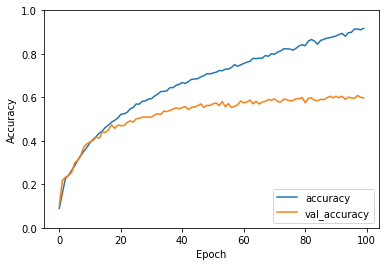

In [77]:
####evaluate model
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Model loss and accuracy:
  On training set:
  loss: 0.3821 - acc: 0.9177 
  On Validation set:
  val_loss: 1.9712 - val_acc: 0.5968

In [78]:
####Lenet5- improved

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((4, 4),padding='same',strides=4))

model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((4, 4), padding='same',strides=4))

model.add(layers.Flatten())
model.add(Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(84, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(101, activation='softmax'))
model.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 64, 64, 32)        2432      
_________________________________________________________________
batch_normalization_22 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 1024)            

In [80]:
from keras import optimizers
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=opt,
              metrics = ['accuracy'])

history = model.fit(X, dummy_y, epochs=100, validation_split=0.1, batch_size=100)

Train on 7809 samples, validate on 868 samples
Epoch 1/100
7809/7809 [==============================] - 3s 375us/sample - loss: 5.0163 - acc: 0.2310 - val_loss: 5.6948 - val_acc: 0.1025
Epoch 2/100
7809/7809 [==============================] - 2s 199us/sample - loss: 4.2704 - acc: 0.3495 - val_loss: 5.6019 - val_acc: 0.0668
Epoch 3/100
7809/7809 [==============================] - 2s 195us/sample - loss: 3.8416 - acc: 0.4203 - val_loss: 5.3621 - val_acc: 0.2281
Epoch 4/100
7809/7809 [==============================] - 2s 196us/sample - loss: 3.4633 - acc: 0.4888 - val_loss: 4.9103 - val_acc: 0.3502
Epoch 5/100
7809/7809 [==============================] - 2s 200us/sample - loss: 3.1297 - acc: 0.5435 - val_loss: 4.3178 - val_acc: 0.4182
Epoch 6/100
7809/7809 [==============================] - 2s 199us/sample - loss: 2.8310 - acc: 0.5978 - val_loss: 3.7933 - val_acc: 0.4505
Epoch 7/100
7809/7809 [==============================] - 2s 198us/sample - loss: 2.5721 - acc: 0.6621 - val_loss: 3.474

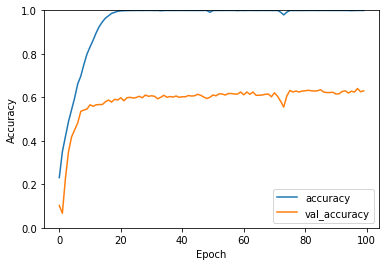

In [81]:
####evaluate model
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

model loss and accuracy: 
On training set:loss: 0.1661 - acc: 0.9994 
On validation set:
val_loss: 2.0176 - val_acc: 0.6302

In [84]:
####Lenet5-linear

model_lin = models.Sequential()
model_lin.add(layers.Conv2D(32, (5, 5), activation='linear', input_shape=(64, 64, 3), padding='valid'))
model_lin.add(layers.BatchNormalization())
model_lin.add(layers.MaxPooling2D((4, 4),padding='same'))

model_lin.add(layers.Conv2D(64, (5, 5), activation='linear', padding='same'))
model_lin.add(layers.BatchNormalization())
model_lin.add(layers.MaxPooling2D((4, 4), padding='same'))

model_lin.add(layers.Flatten())
model_lin.add(Dense(1024, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_lin.add(Dense(84, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_lin.add(Dense(101, activation='softmax'))
model_lin.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
batch_normalization_26 (Batc (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 15, 15, 64)        51264     
_________________________________________________________________
batch_normalization_27 (Batc (None, 15, 15, 64)        256       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1024)            

In [85]:
from keras import optimizers
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.0001)
model_lin.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=opt,
              metrics = ['accuracy'])

history = model_lin.fit(X, dummy_y, epochs=100, validation_split=0.1, batch_size = 200)

Train on 7809 samples, validate on 868 samples
Epoch 1/100
7809/7809 [==============================] - 3s 381us/sample - loss: 5.1863 - acc: 0.2402 - val_loss: 5.5264 - val_acc: 0.1671
Epoch 2/100
7809/7809 [==============================] - 1s 160us/sample - loss: 4.2947 - acc: 0.3623 - val_loss: 5.3437 - val_acc: 0.2051
Epoch 3/100
7809/7809 [==============================] - 1s 162us/sample - loss: 3.9332 - acc: 0.4164 - val_loss: 5.1636 - val_acc: 0.2200
Epoch 4/100
7809/7809 [==============================] - 1s 159us/sample - loss: 3.6901 - acc: 0.4564 - val_loss: 4.9944 - val_acc: 0.2350
Epoch 5/100
7809/7809 [==============================] - 1s 161us/sample - loss: 3.4931 - acc: 0.4908 - val_loss: 4.8468 - val_acc: 0.2396
Epoch 6/100
7809/7809 [==============================] - 1s 161us/sample - loss: 3.3517 - acc: 0.5179 - val_loss: 4.6586 - val_acc: 0.2673
Epoch 7/100
7809/7809 [==============================] - 1s 162us/sample - loss: 3.1953 - acc: 0.5499 - val_loss: 4.486

Training and validation loss before changing activation function: 0.1661, 2.0176 
Training and validation loss before changing activation function: 0.8153, 2.1906

As we can see, the training and validation loss increases after changing activation function to linear. This cannot be compensated by adding more convolutional layers. 

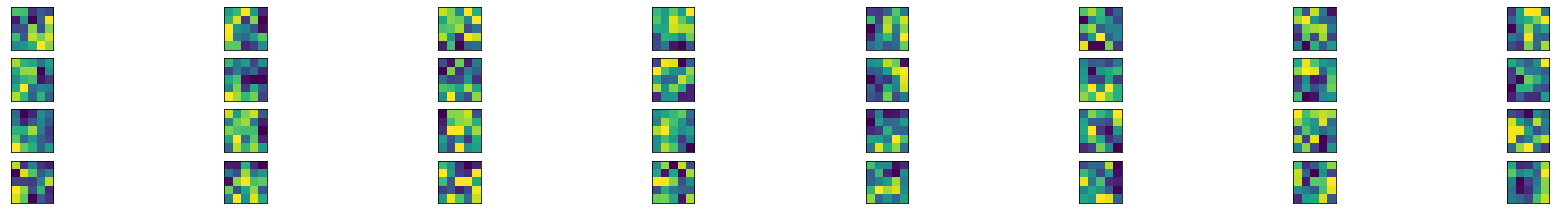

In [88]:
####visualize weights
from matplotlib import pyplot
filters, biases = model_base.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 32, 1
pyplot.figure(figsize=(30,30))
for i in range(n_filters):
  f = filters[:, :, :, i]
  ax = pyplot.subplot(n_filters,8, ix)
  ax.set_xticks([])
  ax.set_yticks([])
  pyplot.imshow(f[:, :, 1])
  ix +=1
